In [2]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Air_Quality.csv')
df.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,172653,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,12/01/2010,25.30,NaN
1,172585,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,12/01/2008,26.93,NaN
2,336637,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,204,East New York,Annual Average 2015,01/01/2015,19.09,NaN
3,336622,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,103,Fordham - Bronx Pk,Annual Average 2015,01/01/2015,19.76,NaN
4,172582,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Annual Average 2009,12/01/2008,22.83,NaN


In [4]:
data = df['Data Value']
data = np.where(data==0, 0.00001,data)
gas_names = df["Name"]

In [11]:
transformed_data, lambda_value = boxcox(data)
transformed_data

array([4.95127932, 5.09141123, 4.34543699, ..., 2.61330315, 2.67824034,
       6.60398776])

(array([  30.,  121.,  691., 5365., 6432., 3104.,  269.,  137.,   62.,
           7.]),
 array([-3.80238953, -2.01780225, -0.23321497,  1.55137231,  3.33595959,
         5.12054687,  6.90513416,  8.68972144, 10.47430872, 12.258896  ,
        14.04348328]),
 <BarContainer object of 10 artists>)

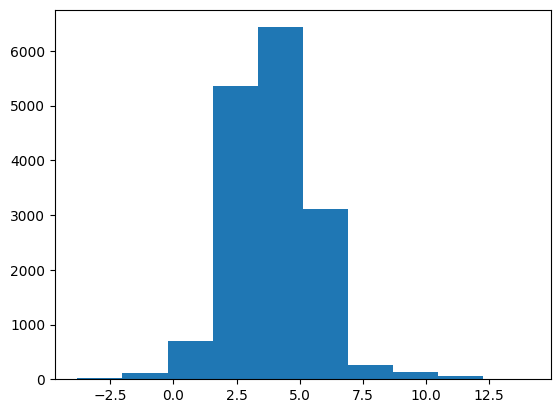

In [56]:
plt.hist(transformed_data)

In [19]:
unique_gas_names = gas_names.unique()
unique_gas_names

array(['Nitrogen dioxide (NO2)', 'Fine particles (PM 2.5)', 'Ozone (O3)',
       'Asthma emergency department visits due to PM2.5',
       'Annual vehicle miles traveled',
       'Asthma hospitalizations due to Ozone',
       'Respiratory hospitalizations due to PM2.5 (age 20+)',
       'Boiler Emissions- Total SO2 Emissions',
       'Cardiovascular hospitalizations due to PM2.5 (age 40+)',
       'Boiler Emissions- Total PM2.5 Emissions',
       'Boiler Emissions- Total NOx Emissions',
       'Annual vehicle miles travelled (cars)',
       'Annual vehicle miles travelled (trucks)',
       'Cardiac and respiratory deaths due to Ozone',
       'Asthma emergency departments visits due to Ozone',
       'Outdoor Air Toxics - Formaldehyde',
       'Outdoor Air Toxics - Benzene', 'Deaths due to PM2.5'],
      dtype=object)

In [21]:
gas_name_maping = {gas_name:i+1 for i, gas_name in enumerate(unique_gas_names)}
gas_name_maping

{'Nitrogen dioxide (NO2)': 1,
 'Fine particles (PM 2.5)': 2,
 'Ozone (O3)': 3,
 'Asthma emergency department visits due to PM2.5': 4,
 'Annual vehicle miles traveled': 5,
 'Asthma hospitalizations due to Ozone': 6,
 'Respiratory hospitalizations due to PM2.5 (age 20+)': 7,
 'Boiler Emissions- Total SO2 Emissions': 8,
 'Cardiovascular hospitalizations due to PM2.5 (age 40+)': 9,
 'Boiler Emissions- Total PM2.5 Emissions': 10,
 'Boiler Emissions- Total NOx Emissions': 11,
 'Annual vehicle miles travelled (cars)': 12,
 'Annual vehicle miles travelled (trucks)': 13,
 'Cardiac and respiratory deaths due to Ozone': 14,
 'Asthma emergency departments visits due to Ozone': 15,
 'Outdoor Air Toxics - Formaldehyde': 16,
 'Outdoor Air Toxics - Benzene': 17,
 'Deaths due to PM2.5': 18}

In [22]:
df['Gas_Maping'] = df['Name'].map(gas_name_maping)

In [25]:
df

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message,Gas_Maping
0,172653,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,12/01/2010,25.30,NaN,1
1,172585,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,12/01/2008,26.93,NaN,1
2,336637,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,204,East New York,Annual Average 2015,01/01/2015,19.09,NaN,1
3,336622,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,103,Fordham - Bronx Pk,Annual Average 2015,01/01/2015,19.76,NaN,1
4,172582,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Annual Average 2009,12/01/2008,22.83,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16213,130750,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,µg/m3,UHF42,211,Williamsburg - Bushwick,2005,01/01/2005,3.10,NaN,16
16214,130780,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,µg/m3,Borough,5,Staten Island,2005,01/01/2005,2.30,NaN,16
16215,131020,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",UHF42,504,South Beach - Tottenville,2005-2007,01/01/2005,7.50,NaN,14
16216,131026,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",Borough,5,Staten Island,2005-2007,01/01/2005,7.80,NaN,14


#### From pearsonr()

In [26]:
from scipy.stats import pearsonr

In [27]:
pearson_coeeficient, p_value = pearsonr(df['Gas_Maping'], df['Data Value'])
print("Spearman's rank correlation coefficient:", pearson_coeeficient)

Spearman's rank correlation coefficient: 0.17329641844400562


### Calculating Manually

1. We need (Gas_Maping)<sup>2</sup> (x)
2. We need (Data Value)<sup>2</sup> (y)
3. we need Gas_Maping * Data Value  (xy)
4. n is total number of obs

## Pearson's Co-relation
## $ r = \frac {n (\sum xy ) - (\sum x.\sum y)} {\sqrt {[n.\sum x^2 - (\sum x)^2] \times [n.\sum y^2 - (\sum y)^2]}} $

- x = Gas_Maping
- y = Data Value 	

In [33]:
n = df['Name'].count()
n

16218

In [35]:
sigma_x = df['Gas_Maping'].sum()
sigma_x

57048

In [36]:
sigma_y = df['Data Value'].sum()
sigma_y

323969.42

In [45]:
x_square = df['Gas_Maping'].apply(lambda num: num**2) # Will store squares in x_square
sigma_x_square = x_square.sum() # Will sum all squared values
sigma_x_square

485786

In [46]:
y_square = df['Data Value'].apply(lambda num: num**2) # Will store squares in y_square
sigma_y_square = y_square.sum() # Will sum all squared values
sigma_y_square

13844524.774

In [52]:
xy = df['Data Value'] * df['Gas_Maping']
sigma_xy = xy.sum()
sigma_xy

1390844.3399999999

#### Applying formula

In [53]:
numerator = (n*(sigma_xy)) - (sigma_x*sigma_y)
numerator

4074906033.959999

In [54]:
denominator = (((n*sigma_x_square) - ((sigma_x)**2)) * ((n*sigma_y_square) - ((sigma_y)**2)))**(1/2)
denominator

23514081078.811333

In [56]:
r = numerator/denominator
r

0.17329641844400712

In [60]:
print("Using pearsonr(): {}\nCalculating Manually: {}:".format(pearson_coeeficient, r))

Using pearsonr(): 0.17329641844400562
Calculating Manually: 0.17329641844400712:
